In [2]:
import torch
import random
import json
import os
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#SETUP
LINE_WIDTH = 3
SMALL_SIZE = 15
SMALLER_SIZE = 12
MEDIUM_SIZE = 22
BIG_SIZE = 20
BIGGER_SIZE = 25
ALPHA = 0.3

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=BIG_SIZE)  # legend fontsize
plt.rc('figure', titlesize=SMALLER_SIZE)  # fontsize of the figure title
plt.rcParams['axes.axisbelow'] = True

'''cm=plt.get_cmap('CMRmap')
NUM_COLORS = len(all_papers)+1
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)][::-1]'''
# https://sashat.me/2017/01/11/list-of-20-simple-distinct-colors/
colors = [(0, 0, 0), 
          (230, 25, 75), 
          (60, 180, 75), 
          (0, 130, 200), 
          (245, 130, 48),
          (145, 30, 180),
          (0, 100, 100), 
          (240, 50, 230), 
          (255, 200, 0),
          (0, 0, 128), 
          #special colors:
          (255, 255, 255), 
          (128, 128, 128),
          #seemingly bad:
          (250, 190, 190),  
          (128, 128, 0), 
          (255, 215, 180),
          (170, 255, 195), 
          (170, 110, 40), 
          (255, 250, 200), 
          (250, 190, 212),  
          (220, 190, 255), 
          (70, 240, 240), 
          (255, 250, 200),
          (170, 255, 195),
         ] 
colors = [[x[0]/255., x[1]/255., x[2]/255.] for x in colors]

colors_d = [[x[0]*0.75, x[1]*0.75, x[2]*0.75] for x in colors]
#Draw the plots without  marker
markers = ['s','D','h','>','o','p','*','x','+']

# Plots

In [4]:
number_of_tokens_list = [0, 1, 2, 4, 8, 16, 32, 64, 128]
# load csv
csv_file = "results/safety_analysis_measures.csv"
df = pd.read_csv(csv_file)

In [5]:
df.head(1)

,model,llama_guard3_scores,std_llama_guard3_scores
0,Llama-3.1-8B-Instruct,"[0.08, 0.075, 0.05, 0.045, 0.035, 0.085, 0.12,...","[0.2712931993250107, 0.26339134382131846, 0.21..."


In [6]:
model = df['model'].tolist()[0]
llama_guard3_scores = df['llama_guard3_scores'].apply(json.loads).tolist()[0]

In [7]:
llama_guard3_scores

[0.08, 0.075, 0.05, 0.045, 0.035, 0.085, 0.12, 0.225, 0.775]

In [8]:
number_of_tokens_list

[0, 1, 2, 4, 8, 16, 32, 64, 128]

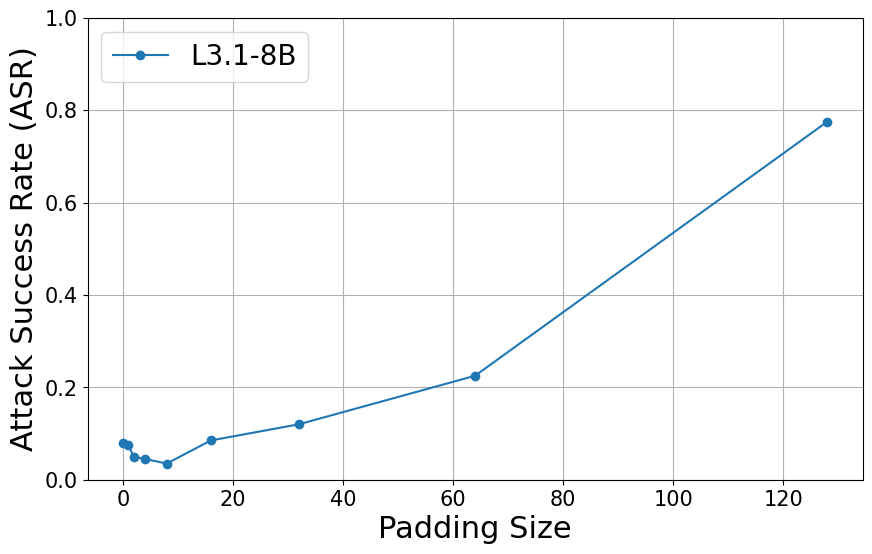

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(number_of_tokens_list, llama_guard3_scores, marker='o', label=['L3.1-8B'])
plt.xlabel("Padding Size")
plt.ylabel("Attack Success Rate (ASR)")
# plt.title("ASR vs. Padding Size - L3.1-8B")
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.grid()
# save to pdf file in plots/
if not os.path.exists("plots"):
    os.makedirs("plots")
plt.savefig("plots/llama_guard3_mean_score_vs_padding_size.pdf")
plt.show()